In [208]:
import pandas as pd

In [209]:
import numpy as np

In [210]:
from matplotlib import pyplot as plt

In [211]:
import matplotlib 

In [212]:
matplotlib.rcParams["figure.figsize"] = (20,10)

In [213]:
data=pd.read_csv("C:/Users/elcot/Documents/Bengaluru_House_Data.csv")

In [214]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [215]:
data.shape

(13320, 9)

In [216]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [217]:
data1=data.drop(['area_type','availability','balcony','society'],axis=1)

In [218]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [219]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [220]:
data1=data1.dropna()

In [221]:
data1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [222]:
data1.shape

(13246, 5)

In [223]:
data1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [224]:
data1['bhk']=data1['size'].apply(lambda x: int(x.split(' ')[0]))

In [225]:
data1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [226]:
data1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [227]:
data1[data1.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [228]:
data1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [229]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [230]:
data1[~data1['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [231]:
def convert_sqft_to_num(x):
    tokens =x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [232]:
data2=data1.copy()

In [233]:
data2['total_sqft']=data2['total_sqft'].apply(convert_sqft_to_num)

In [234]:
data2['price_per_sqft']=data2['price']*100000/data2['total_sqft']

In [235]:
len(data2.location.unique())

1304

In [236]:
data2.location=data2.location.apply(lambda x: x.strip())

In [237]:
location_status=data2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [238]:
location_status

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [239]:
len(data2.location.unique())

1293

In [240]:
len(location_status[location_status<=10])

1052

In [241]:
less_than_10_location=location_status[location_status<=10]

In [242]:
data2.location=data2.location.apply(lambda x: 'other' if x in less_than_10_location else x )

In [243]:
data2[data2.total_sqft/data2.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [244]:
data2.shape

(13246, 7)

In [248]:
data2=data2[~(data2.total_sqft/data2.bhk<300)]

In [249]:
data2.shape

(12502, 7)

In [250]:
data2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [251]:
def remove_outliers(data):
    df_out=pd.DataFrame()
    for key,subdf in data.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out 
data3=remove_outliers(data2)

In [252]:
data3.shape

(10241, 7)

In [253]:
import matplotlib

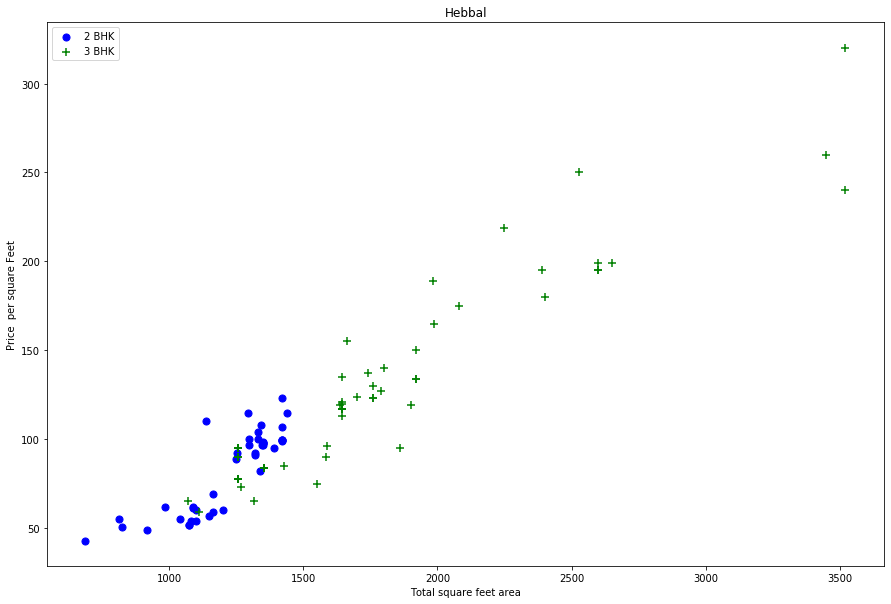

In [254]:
def plot_scatter_chart(data2,location):
    bhk2=data2[(data2.location==location)&(data2.bhk==2)]
    bhk3=data2[(data2.location==location)&(data2.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price  per square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Hebbal")    

In [255]:
def remove_outliers(data):
    exclude_indices=np.array([])
    for location,location_data in data.groupby('location'):
        bhk_status={}
        for bhk,bhk_data in location_data.groupby('bhk'):
            bhk_status[bhk]={
                'mean': np.mean(bhk_data.price_per_sqft),
                'std': np.std(bhk_data.price_per_sqft),
                'count':bhk_data.shape[0]
            }
        for bhk,bhk_data in location_data.groupby('bhk'):
            status=bhk_status.get(bhk-1)
            if status and status['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_data[bhk_data.price_per_sqft<(status['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')   
data4=remove_outliers(data3)

In [256]:
data4.shape

(7329, 7)

In [257]:
data3.shape

(10241, 7)

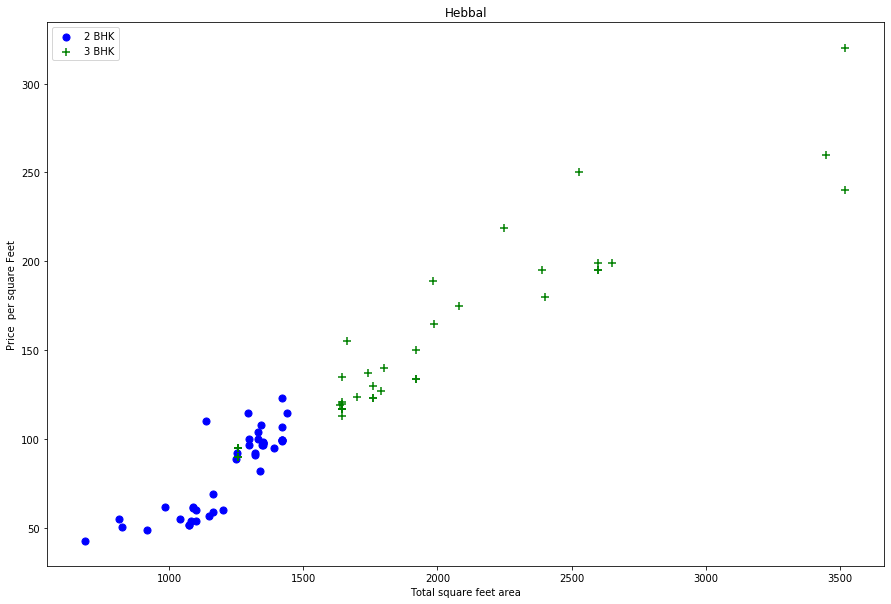

In [258]:
def plot_scatter_chart(data2,location):
    bhk2=data2[(data2.location==location)&(data2.bhk==2)]
    bhk3=data2[(data2.location==location)&(data2.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price  per square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(data4,"Hebbal")    

In [259]:
data4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [260]:
data4[data4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [261]:
data4[data4.bath>data4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [262]:
data5=data4[data4.bath<data4.bhk+2]

In [263]:
data6=data5.drop(['size','price_per_sqft'],axis=1)

In [264]:
data6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [265]:
dummies=pd.get_dummies(data6.location)

In [266]:
data7 = pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')

In [267]:
data8 = data7.drop('location',axis='columns')

In [268]:
X = data8.drop(['price'],axis='columns')

In [269]:
y = data8.price

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
lr_clf = LinearRegression()

In [274]:
lr_clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [275]:
lr_clf.score(X_test,y_test)

0.8452277697874315

In [276]:
from sklearn.model_selection import ShuffleSplit

In [277]:
from sklearn.model_selection import cross_val_score

In [278]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [279]:
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [280]:
from sklearn.model_selection import GridSearchCV


In [281]:
from sklearn.linear_model import Lasso

In [282]:
from sklearn.tree import DecisionTreeRegressor

In [283]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.716389,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
we